IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

**IMPORTING THE DATASET **

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving SocialNetworkAds.csv to SocialNetworkAds.csv
User uploaded file "SocialNetworkAds.csv" with length 10928 bytes


In [ ]:
social_network = pd.read_csv('SocialNetworkAds.csv')

EXTRACTING THE INDEPENDENT VARIABLES

In [ ]:
X = social_network.iloc[:, [2,3]]

EXTRACTING THE DEPENDENT VARIABLES

In [ ]:
Y = social_network.iloc[:, 4]

visualizing the dataset

In [ ]:
social_network['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

<Axes: >

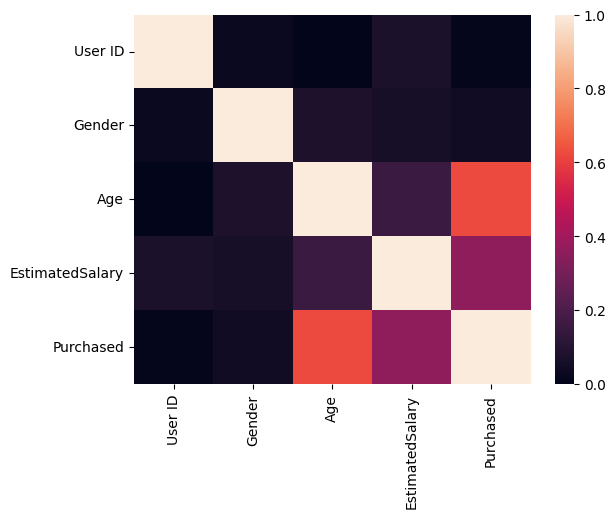

In [ ]:
sns.heatmap(social_network.corr())

splitting the datasets into training annd testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state =0)

feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
sc_X = StandardScaler()

# Fit the scaler to your training data and transform it
X_train= sc_X.fit_transform(X_train)

# Transform your test data using the same scaler
X_test=sc_X.transform(X_test)

Fit logistic regression to training datset

In [ ]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(random_state=0)
LogR.fit(X_train, Y_train)

LogisticRegression(random_state=0)

PREDICTING THE TEST SET RESULTS

In [ ]:
y_pred= LogR.predict( X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1])

<ipython-input-16-c48d80b3a908>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


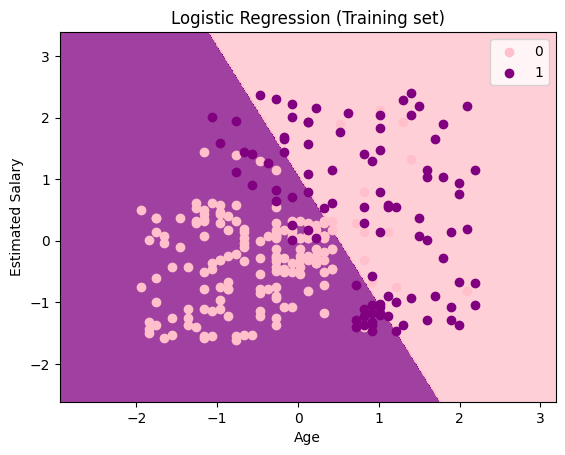

In [ ]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step =0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step =0.01))
plt.contourf(X1, X2, LogR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('purple', 'pink')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('pink', 'purple'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()